Given a quadratic form: 
$$\frac{1}{2}x^\top A x - b^\top x +c,\quad  b \in \mathbb{R}^n, \quad A~SPD.
$$
We have seen that it's minimizer satisfies $Ax=b$.

Let's consider $$A=\begin{pmatrix} 3 & 2 \\ 2 & 6 \end{pmatrix}, \quad b=\begin{pmatrix} 2 \\ -8 \end{pmatrix}
$$



/Users/Undertrick/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


800


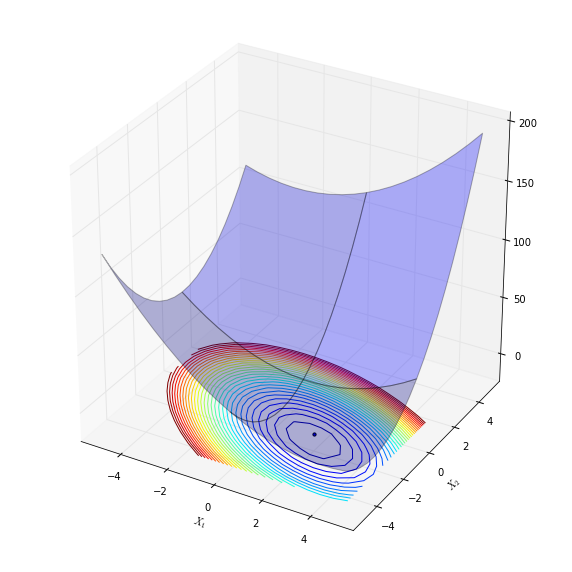

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = 10, 10

len=20
A=np.array([[3,2],[2,6]],'float')
b=np.array([2,-8])
xc=np.linspace(-5,5,len)
xg=np.meshgrid(xc,xc)
xg=np.array(xg)
print xg.size
xt=np.reshape(xg,(2,len**2))
qform=.5*np.sum(np.multiply(xt,np.dot(A,xt)),axis=0)-np.dot(b,xt)
#print qform
qform=np.reshape(qform,(len,len))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.plot_surface(xg[0],xg[1],qform,alpha=.3)
ctrs=np.linspace(-10,50,30)
ax.contour(xg[0],xg[1],qform,offset=-15,levels=ctrs)
ax.scatter3D(2,-2,-10,s=10)

/Users/Undertrick/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  from ipykernel import kernelapp as app


12.0


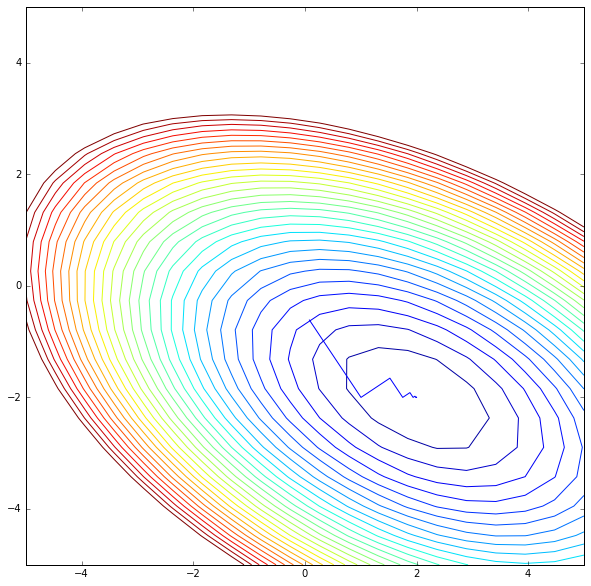

In [2]:
def steepest(A,b,x=None):
    if x==None:
        x=np.zeros(b.size)
    r=b-np.dot(A,x)
    a=np.array([]).reshape((0,1))
    r.reshape((1,2))
    print r[0]
    iter=0
    while iter < 20 and np.linalg.norm(r[iter])>1E-8:
        if iter==0:
            rvec=r
            xvec=x
        else:
            rvec=r[iter]
            xvec=x[iter]
        Ar=np.dot(A,rvec)
        temp=np.dot(rvec,rvec)/np.dot(rvec,Ar)
        a=np.append(a,temp)
        temp=xvec+a[iter]*rvec
        x=np.vstack((x,temp))
        r=np.vstack((r,rvec-a[iter]*Ar))
        iter=iter+1
    return x

sd=np.array([-2,-2])
out=steepest(A,b,sd)
fig2=plt.figure()
plt.contour(xg[0],xg[1],qform,levels=ctrs)
plt.plot(out[1:,0],out[1:,1],c='b',ms=5)
plt.show()


In [3]:
def Mdot(v1,v2,M=None):
    if M==None:
        return np.dot(v1,v2)
    return np.dot(v1,np.dot(M,v2))

def conjgrad(A,b,x=None,maxiter=20,M=None):
    if x==None:
        x=np.zeros(b.size)
    r=b-Mdot(A,x,M)
    a=np.array([]).reshape((0,1))
    beta=a
    r.reshape((1,b.size))
    if M==None:
        d=r
    else:
        d=np.dot(M,r)
    iter=0
    res_norm=np.linalg.norm(r[iter])
    residuals=res_norm
    while iter < maxiter and res_norm>1E-8:
        if iter==0:
            rvec=r
            xvec=x
            dvec=d
        else:
            rvec=r[iter]
            xvec=x[iter]
            dvec=d[iter]
        Ad=np.dot(A,dvec)
        temp=np.divide(Mdot(rvec,rvec,M),np.dot(dvec,Ad))
        a=np.append(a,temp)
        temp=xvec+a[iter]*dvec
        x=np.vstack((x,temp))
        temp=rvec-a[iter]*Ad
        r=np.vstack((r,temp))
        temp=Mdot(r[iter+1],r[iter+1],M)/Mdot(rvec,rvec,M)
        beta=np.append(beta,temp)
        if M==None:
            d=np.vstack((d,r[iter+1]+beta[iter]*dvec))
        else:
            d=np.vstack((d,np.dot(M,r[iter+1])+beta[iter]*dvec))
        iter=iter+1
        res_norm=np.linalg.norm(r[iter])
        print iter,res_norm
        residuals=np.append(residuals,res_norm)
    return x,residuals

1 72.6719740187
2 25.374479779
3 11.454105669
4 6.06706184623
5 3.62650114451
6 2.37654857498
7 1.63311066684
8 1.12623301355
9 0.767416247714
10 0.518736763509
11 0.348349942114
12 0.232094819988
13 0.155324398744
14 0.108052216959
15 0.0795243101675
16 0.0587545935286
17 0.0411636854169
18 0.0281470081664
19 0.0192815781043
20 0.013115495495
21 0.00880648555274
22 0.00551008295998
23 0.00320080644577
24 0.00182275455708
25 0.00100000428999
26 0.000595921287931
27 0.000379181291649
28 0.000226889954832
29 0.000140467241324
30 8.7234776259e-05
31 6.50254793187e-05
32 4.64457038548e-05
33 2.92334645116e-05
34 1.64876317202e-05
35 8.89504053042e-06
36 5.2585382631e-06
37 2.88451100117e-06
38 1.77523197211e-06
39 9.68542036818e-07
40 5.57202409576e-07
1 9.40999645234
2 1.18979763929
3 0.286726874784
4 0.0850289066231
5 0.021401121343
6 0.00569339557848
7 0.00113486878878
8 0.0002973598647
9 6.26199468748e-05
10 1.1079276035e-05
11 2.0199984314e-06
12 4.63285461404e-07
13 7.84405921697e-08

/Users/Undertrick/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  from ipykernel import kernelapp as app
/Users/Undertrick/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/Users/Undertrick/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


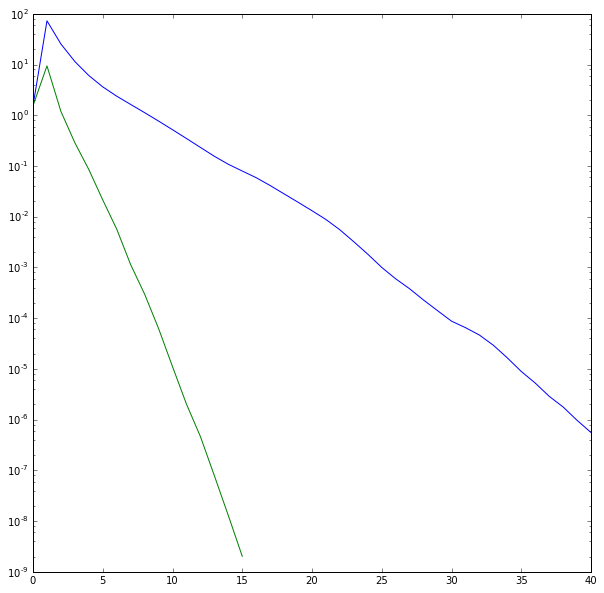

In [5]:
import numpy as np

def ichol(a):
    n=np.size(a,axis=0)   
    for k in xrange(n):
        a[k,k] = np.sqrt(a[k,k])
        for i in xrange(k+1,n):
            if a[i,k] != 0:
                a[i,k] = a[i,k]/a[k,k]         
        for j in xrange(k+1,n):
            for i in xrange(j,n):
                if a[i,j] != 0:
                    a[i,j] = a[i,j]-a[i,k]*a[j,k]
                        
    for i in xrange(n):
        for j in xrange(i+1,n):
            a[i,j] = 0
    return a

N=501
A=np.diag(np.sqrt(range(1,N)))+np.diag(np.cos(range(1,N-10)),10)+np.diag(np.cos(range(1,N-10)),-10)
b=np.dot(A,np.ones(N-1))
vec=conjgrad(A,b,maxiter=40)
vec2=conjgrad(A,b,maxiter=40,M=np.diag(1.0/np.diag(A)))
plt.semilogy(vec[1])
plt.semilogy(vec2[1])


In [30]:
B=ichol(A)


In [32]:
print np.diag(B,-10)

[  5.40302306e-01  -3.20893078e-01  -6.55709435e-01  -3.88658822e-01
   1.55127107e-01   4.90389930e-01   3.63415358e-01  -6.67120596e-02
  -3.99704953e-01  -3.53833530e-01   2.11529316e-03   3.51468894e-01
   4.54137968e-01   5.53914650e-02  -2.78821131e-01  -3.90103939e-01
  -1.02474327e-01   2.23908379e-01   3.58744369e-01   1.42265582e-01
  -1.74877776e-01  -3.34796989e-01  -1.80728866e-01   1.29010152e-01
   3.08807692e-01   2.05292533e-01  -8.53196420e-02  -2.83137069e-01
  -2.25441920e-01   4.35051340e-02   2.56295183e-01   2.40254980e-01
  -3.63263916e-03  -2.28008072e-01  -2.49565921e-01  -3.40401951e-02
   1.98311328e-01   2.53762896e-01   6.91041994e-02  -1.67379384e-01
  -2.53094652e-01  -1.01124920e-01   1.35467034e-01   2.47895167e-01
   1.29667093e-01  -1.02886425e-01  -2.38535367e-01  -1.54346295e-01
   6.99982011e-02   2.25407287e-01   1.74853620e-01  -3.72075699e-02
  -2.08914745e-01  -1.90977280e-01   4.96000137e-03   1.89467797e-01
   2.02610021e-01   2.62666986e-02

In [33]:
E=np.diag(np.sqrt(1.0/np.diag(A)))

In [34]:
lam1=np.linalg.eigvalsh(A)
lam2=np.linalg.eigvalsh(np.dot(E,np.dot(A,E)))

Binv=np.linalg.inv(B)
C=np.dot(Binv,np.dot(A,Binv.transpose()))
lam3=np.linalg.eigvalsh(C)

In [35]:
print np.min(lam1),np.max(lam1)
print np.min(lam2),np.max(lam2)
print np.min(lam3),np.max(lam3)


0.377287703589 2.30825190091
0.320790862323 1.67920913768
0.460129252056 1.0


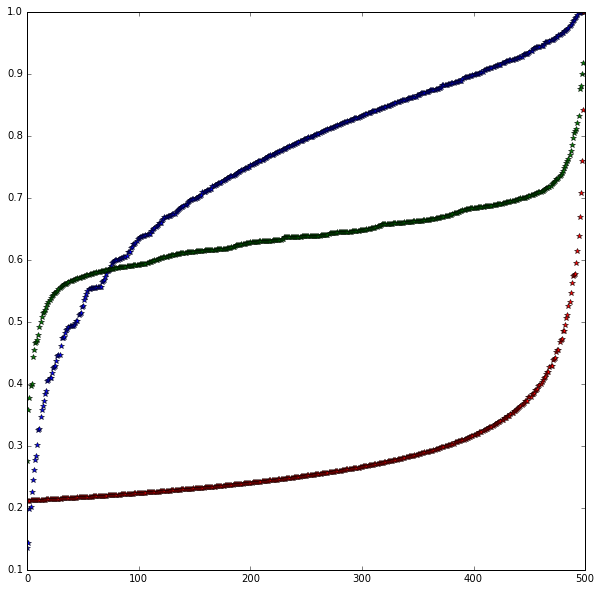

In [29]:
plt.plot(lam1/np.max(lam1),marker='*',linestyle='')
plt.plot(lam2/np.max(lam2),marker='*',linestyle='')
plt.plot(lam3/np.max(lam3),marker='*',linestyle='')